<a href="https://colab.research.google.com/github/lluk4z/MiniprojetoFinal-Bcw6-Soulcode/blob/main/MiniProjetoFinalPandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install apache-beam[gcp]

In [ ]:
pip install fsspec

In [ ]:
pip install gcsfs

In [3]:
import pandas as pd
import gcsfs
from io import BytesIO, StringIO
from google.cloud import storage
from google.oauth2 import service_account

# Criação do dataframe a partir dos dados armazenados no bucket

In [4]:
fs = gcsfs.GCSFileSystem(project='miniprojetofinal')
with fs.open('gs://bucket-mini-projeto-lucas-emanuel/marketing_campaign.csv') as f:
    df = pd.read_csv(f, parse_dates=['Dt_Customer'], dayfirst=True)

In [5]:
df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [6]:
df = df.drop(columns=['Unnamed: 0'])
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

# Tradução do dataframe

In [8]:
list(df.columns)


['ID',
 'Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response']

In [9]:
columns_name = ['ID',
 'Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response']

In [10]:
nome_colunas = ['ID', 'Ano_nascimento', 'Educacao' ,'Estado_civil', 'Renda', 'Crianca_em_casa', 'Adolescente_em_casa', 'Dt_Cliente', 'Recencia', 'QtdVinhos', 'QtdFrutas', 'QtdProdutosCarne', 'QtdProdutosPeixe', 'QtdProdutosDoces', 'QtdProdutosGold', 'NumOfertasDeCompra', 'NumOfertasWeb', 'NumOfertasCatalogo', 'NumComprasNaLoja', 'NumVisitasWebMes', 'Cmp3Aceito', 'Cmp4Aceito', 'Cmp5Aceito', 'Cmp1Aceito', 'Cmp2Aceito', 'Reclamacoes', 'Z_CustoContato', 'Z_Receita', 'Resposta']

In [11]:
df.columns = nome_colunas

In [12]:
df.head()

,ID,Ano_nascimento,Educacao,Estado_civil,Renda,Crianca_em_casa,Adolescente_em_casa,Dt_Cliente,Recencia,QtdVinhos,QtdFrutas,QtdProdutosCarne,QtdProdutosPeixe,QtdProdutosDoces,QtdProdutosGold,NumOfertasDeCompra,NumOfertasWeb,NumOfertasCatalogo,NumComprasNaLoja,NumVisitasWebMes,Cmp3Aceito,Cmp4Aceito,Cmp5Aceito,Cmp1Aceito,Cmp2Aceito,Reclamacoes,Z_CustoContato,Z_Receita,Resposta
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [13]:
df['Ano_nascimento'].unique()

array([1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983,
       1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969,
       1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977,
       1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962,
       1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994,
       1941, 1944, 1995, 1940])

In [14]:
filtro  = df['Ano_nascimento'] > 1900

In [ ]:
df_new = df[filtro]

In [ ]:
df_new.head()

,ID,Ano_nascimento,Educacao,Estado_civil,Renda,Crianca_em_casa,Adolescente_em_casa,Dt_Cliente,Recencia,QtdVinhos,QtdFrutas,QtdProdutosCarne,QtdProdutosPeixe,QtdProdutosDoces,QtdProdutosGold,NumOfertasDeCompra,NumOfertasWeb,NumOfertasCatalogo,NumComprasNaLoja,NumVisitasWebMes,Cmp3Aceito,Cmp4Aceito,Cmp5Aceito,Cmp1Aceito,Cmp2Aceito,Reclamacoes,Resposta
0,5524,1957,Graduação,Solteiro,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduação,Solteiro,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduação,Junto,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduação,Junto,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Casado,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


In [15]:
df['Educacao'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [16]:
df.Educacao = df.Educacao.map({ 'Graduation' : 'Graduação', 'PhD' : 'PhD', 'Master' : 'Mestrado', 'Basic' : 'Basico', '2n Cycle' : '2nd Ciclo'})

In [17]:
df['Estado_civil'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [18]:
df['Recencia'].unique()

array([58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 82, 53, 23, 51, 20, 91,
       86, 41, 42, 63,  0, 69, 89,  4, 96, 56, 31,  8, 55, 37, 76, 99,  3,
       88, 80, 72, 24, 92, 39, 29,  2, 54, 57, 30, 12, 18, 75, 90,  1, 25,
       40,  9, 87,  5, 95, 48, 70, 79, 45, 84, 44, 43, 35, 15, 17, 46, 27,
       74, 85, 65, 13, 83, 10, 21, 61, 73, 47, 36, 49, 28, 64, 98, 78, 77,
       81, 14, 52, 93, 50, 60, 66, 97, 62,  6, 33, 67, 22, 71,  7])

In [19]:
df.Estado_civil = df.Estado_civil.map({ 'Single' : 'Solteiro', 'Together' : 'Junto', 'Married' : 'Casado', 'Divorced' : 'Divorciado', 'Widow' : 'Viuva', 'Alone' : 'Só', 'Absurd' : 'Absurdo', 'YOLO' : 'YOLO'})

In [20]:
df.head()

,ID,Ano_nascimento,Educacao,Estado_civil,Renda,Crianca_em_casa,Adolescente_em_casa,Dt_Cliente,Recencia,QtdVinhos,QtdFrutas,QtdProdutosCarne,QtdProdutosPeixe,QtdProdutosDoces,QtdProdutosGold,NumOfertasDeCompra,NumOfertasWeb,NumOfertasCatalogo,NumComprasNaLoja,NumVisitasWebMes,Cmp3Aceito,Cmp4Aceito,Cmp5Aceito,Cmp1Aceito,Cmp2Aceito,Reclamacoes,Z_CustoContato,Z_Receita,Resposta
0,5524,1957,Graduação,Solteiro,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduação,Solteiro,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduação,Junto,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduação,Junto,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Casado,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


# Limpando dados inconsistentes

In [21]:
df['Z_CustoContato'].unique()

array([3])

In [22]:
df['Z_Receita'].unique()

array([11])

In [23]:
# Excluir colunas que possuem valores únicos
df = df.drop(columns=['Z_CustoContato'])
df = df.drop(columns=['Z_Receita'])

In [24]:
df.isnull().sum()

ID                      0
Ano_nascimento          0
Educacao                0
Estado_civil            0
Renda                  24
Crianca_em_casa         0
Adolescente_em_casa     0
Dt_Cliente              0
Recencia                0
QtdVinhos               0
QtdFrutas               0
QtdProdutosCarne        0
QtdProdutosPeixe        0
QtdProdutosDoces        0
QtdProdutosGold         0
NumOfertasDeCompra      0
NumOfertasWeb           0
NumOfertasCatalogo      0
NumComprasNaLoja        0
NumVisitasWebMes        0
Cmp3Aceito              0
Cmp4Aceito              0
Cmp5Aceito              0
Cmp1Aceito              0
Cmp2Aceito              0
Reclamacoes             0
Resposta                0
dtype: int64

Nos passos a baixo é realizado um *data inputation* com o objetivo de substituir os dados faltantes da coluna de Renda. É utilizado o algoritmo KNN com número de vizinhos igual a 3. Assim, os dados faltantes são realocados para o valor de maior predominância entres seus vizinhos.

In [ ]:
pip install fancyimpute

In [26]:
import sklearn
from fancyimpute import KNN

In [27]:
print(df['Renda'].mean())
print(df['Renda'].median())

52247.25135379061
51381.5


In [28]:
df_knn = df.drop(columns=["Educacao", "Estado_civil", "Dt_Cliente"])

df_knn

,ID,Ano_nascimento,Renda,Crianca_em_casa,Adolescente_em_casa,Recencia,QtdVinhos,QtdFrutas,QtdProdutosCarne,QtdProdutosPeixe,QtdProdutosDoces,QtdProdutosGold,NumOfertasDeCompra,NumOfertasWeb,NumOfertasCatalogo,NumComprasNaLoja,NumVisitasWebMes,Cmp3Aceito,Cmp4Aceito,Cmp5Aceito,Cmp1Aceito,Cmp2Aceito,Reclamacoes,Resposta
0,5524,1957,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0


In [29]:
df_knn = KNN(k=3).fit_transform(df_knn)

Imputing row 1/2240 with 0 missing, elapsed time: 1.149
Imputing row 101/2240 with 0 missing, elapsed time: 1.150
Imputing row 201/2240 with 0 missing, elapsed time: 1.151
Imputing row 301/2240 with 0 missing, elapsed time: 1.152
Imputing row 401/2240 with 0 missing, elapsed time: 1.153
Imputing row 501/2240 with 0 missing, elapsed time: 1.154
Imputing row 601/2240 with 0 missing, elapsed time: 1.154
Imputing row 701/2240 with 0 missing, elapsed time: 1.155
Imputing row 801/2240 with 0 missing, elapsed time: 1.156
Imputing row 901/2240 with 0 missing, elapsed time: 1.157
Imputing row 1001/2240 with 0 missing, elapsed time: 1.158
Imputing row 1101/2240 with 0 missing, elapsed time: 1.158
Imputing row 1201/2240 with 0 missing, elapsed time: 1.159
Imputing row 1301/2240 with 0 missing, elapsed time: 1.159
Imputing row 1401/2240 with 0 missing, elapsed time: 1.160
Imputing row 1501/2240 with 0 missing, elapsed time: 1.161
Imputing row 1601/2240 with 0 missing, elapsed time: 1.161
Imputing 

In [30]:
df2 = df

In [31]:
df2 = pd.DataFrame(df2)


In [32]:
list(df2.columns)

['ID',
 'Ano_nascimento',
 'Educacao',
 'Estado_civil',
 'Renda',
 'Crianca_em_casa',
 'Adolescente_em_casa',
 'Dt_Cliente',
 'Recencia',
 'QtdVinhos',
 'QtdFrutas',
 'QtdProdutosCarne',
 'QtdProdutosPeixe',
 'QtdProdutosDoces',
 'QtdProdutosGold',
 'NumOfertasDeCompra',
 'NumOfertasWeb',
 'NumOfertasCatalogo',
 'NumComprasNaLoja',
 'NumVisitasWebMes',
 'Cmp3Aceito',
 'Cmp4Aceito',
 'Cmp5Aceito',
 'Cmp1Aceito',
 'Cmp2Aceito',
 'Reclamacoes',
 'Resposta']

In [33]:
df_3 = pd.DataFrame(data=df_knn[0:,0:],columns=['ID',
 'Ano_nascimento',
 'Renda',
 'Crianca_em_casa',
 'Adolescente_em_casa',
 'Recencia',
 'QtdVinhos',
 'QtdFrutas',
 'QtdProdutosCarne',
 'QtdProdutosPeixe',
 'QtdProdutosDoces',
 'QtdProdutosGold',
 'NumOfertasDeCompra',
 'NumOfertasWeb',
 'NumOfertasCatalogo',
 'NumComprasNaLoja',
 'NumVisitasWebMes',
 'Cmp3Aceito',
 'Cmp4Aceito',
 'Cmp5Aceito',
 'Cmp1Aceito',
 'Cmp2Aceito',
 'Reclamacoes',
 'Resposta'])

In [34]:
df_3.head()

,ID,Ano_nascimento,Renda,Crianca_em_casa,Adolescente_em_casa,Recencia,QtdVinhos,QtdFrutas,QtdProdutosCarne,QtdProdutosPeixe,QtdProdutosDoces,QtdProdutosGold,NumOfertasDeCompra,NumOfertasWeb,NumOfertasCatalogo,NumComprasNaLoja,NumVisitasWebMes,Cmp3Aceito,Cmp4Aceito,Cmp5Aceito,Cmp1Aceito,Cmp2Aceito,Reclamacoes,Resposta
0,5524.0,1957.0,58138.0,0.0,0.0,58.0,635.0,88.0,546.0,172.0,88.0,88.0,3.0,8.0,10.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2174.0,1954.0,46344.0,1.0,1.0,38.0,11.0,1.0,6.0,2.0,1.0,6.0,2.0,1.0,1.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4141.0,1965.0,71613.0,0.0,0.0,26.0,426.0,49.0,127.0,111.0,21.0,42.0,1.0,8.0,2.0,10.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6182.0,1984.0,26646.0,1.0,0.0,26.0,11.0,4.0,20.0,10.0,3.0,5.0,2.0,2.0,0.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5324.0,1981.0,58293.0,1.0,0.0,94.0,173.0,43.0,118.0,46.0,27.0,15.0,5.0,5.0,3.0,6.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   float64
 1   Ano_nascimento       2240 non-null   float64
 2   Renda                2240 non-null   float64
 3   Crianca_em_casa      2240 non-null   float64
 4   Adolescente_em_casa  2240 non-null   float64
 5   Recencia             2240 non-null   float64
 6   QtdVinhos            2240 non-null   float64
 7   QtdFrutas            2240 non-null   float64
 8   QtdProdutosCarne     2240 non-null   float64
 9   QtdProdutosPeixe     2240 non-null   float64
 10  QtdProdutosDoces     2240 non-null   float64
 11  QtdProdutosGold      2240 non-null   float64
 12  NumOfertasDeCompra   2240 non-null   float64
 13  NumOfertasWeb        2240 non-null   float64
 14  NumOfertasCatalogo   2240 non-null   float64
 15  NumComprasNaLoja     2240 non-null   f

In [36]:
df_3.isnull().sum()

ID                     0
Ano_nascimento         0
Renda                  0
Crianca_em_casa        0
Adolescente_em_casa    0
Recencia               0
QtdVinhos              0
QtdFrutas              0
QtdProdutosCarne       0
QtdProdutosPeixe       0
QtdProdutosDoces       0
QtdProdutosGold        0
NumOfertasDeCompra     0
NumOfertasWeb          0
NumOfertasCatalogo     0
NumComprasNaLoja       0
NumVisitasWebMes       0
Cmp3Aceito             0
Cmp4Aceito             0
Cmp5Aceito             0
Cmp1Aceito             0
Cmp2Aceito             0
Reclamacoes            0
Resposta               0
dtype: int64

In [37]:
df2['Renda'] = df_3['Renda']

In [38]:
df2.isnull().sum()

ID                     0
Ano_nascimento         0
Educacao               0
Estado_civil           0
Renda                  0
Crianca_em_casa        0
Adolescente_em_casa    0
Dt_Cliente             0
Recencia               0
QtdVinhos              0
QtdFrutas              0
QtdProdutosCarne       0
QtdProdutosPeixe       0
QtdProdutosDoces       0
QtdProdutosGold        0
NumOfertasDeCompra     0
NumOfertasWeb          0
NumOfertasCatalogo     0
NumComprasNaLoja       0
NumVisitasWebMes       0
Cmp3Aceito             0
Cmp4Aceito             0
Cmp5Aceito             0
Cmp1Aceito             0
Cmp2Aceito             0
Reclamacoes            0
Resposta               0
dtype: int64

In [39]:
df2.head()

,ID,Ano_nascimento,Educacao,Estado_civil,Renda,Crianca_em_casa,Adolescente_em_casa,Dt_Cliente,Recencia,QtdVinhos,QtdFrutas,QtdProdutosCarne,QtdProdutosPeixe,QtdProdutosDoces,QtdProdutosGold,NumOfertasDeCompra,NumOfertasWeb,NumOfertasCatalogo,NumComprasNaLoja,NumVisitasWebMes,Cmp3Aceito,Cmp4Aceito,Cmp5Aceito,Cmp1Aceito,Cmp2Aceito,Reclamacoes,Resposta
0,5524,1957,Graduação,Solteiro,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduação,Solteiro,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduação,Junto,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduação,Junto,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Casado,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


In [40]:
print(df2['Renda'].mean())
print(df2['Renda'].median())

52238.74641473112
51342.0


In [ ]:
pip install gcloud

In [ ]:
import os

serviceAccount = '/content/miniprojetofinal-85ab556ec3ea.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

In [ ]:
df2.to_csv('marketing_campaign_tratado.csv')

# Adicionais:
## Classificação

In [64]:
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from math import sqrt

%matplotlib inline

import matplotlib.pyplot as plt



In [84]:
X = df2.drop(columns=['Resposta', 'Educacao', 'Estado_civil', 'Dt_Cliente'], axis=1)
y = df2['Resposta']
#20% dos dados para TESTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [66]:
scaler_RN = StandardScaler()
scaler_RN.fit(X_train)

dados_train_RN = scaler_RN.transform(X_train)
dados_test_RN = scaler_RN.transform(X_test)

In [67]:
MultiLP = MLPClassifier(hidden_layer_sizes = (5, 5), solver = 'sgd', learning_rate_init = 0.1)
MultiLP.fit(X_train, y_train)
rotulos_pred_RN = MultiLP.predict(X_test)

In [68]:
def valitation_model (X2, y2, model):
  score_model = model.score(X2, y2)

  print('Score: ', score_model)

  y_pred = model.predict(X2)

  conf_matrix = confusion_matrix(y2, y_pred)
  conf_matrix = (pd.crosstab(y2, y_pred, rownames=['Real'], colnames=['Predict'], margins=True))
  print('')
  print('Confusion matrix: ')
  print(conf_matrix)

  fpr, tpr, thresholds = metrics.roc_curve(y2, y_pred, pos_label=2)
  AUC = metrics.auc(fpr, tpr)
  print('')
  print('AUC: ', AUC)

  print('')
  plt.title('ROC curve')
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUC)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()
  print('')

  rmse = sqrt(mean_squared_error(y2, y_pred))
  print('Mean square error: ', rmse)

Score:  0.8214285714285714

Confusion matrix: 
Predict    0  All
Real             
0        368  368
1         80   80
All      448  448

AUC:  nan



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


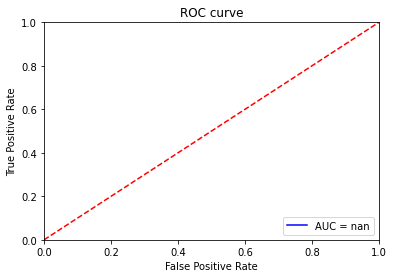


Mean square error:  0.4225771273642583


In [69]:
valitation_model(X_test, y_test, MultiLP)

# KNN

In [70]:
import numpy as np
import scipy.spatial
import pandas as pd
from collections import Counter
from scipy.spatial import distance

In [71]:
class KNN:
    def __init__(self, k):
        self.k = k
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
    def distanciaEuclidiana(self, X1, X2):
        euclides = scipy.spatial.distance.euclidean(X1, X2)
    def predict(self, X_test):
        saida = []
        for i in range(len(X_test)):
            d = []
            votes = []
            for j in range(len(X_train)):
                dist = scipy.spatial.distance.euclidean(X_train[j] , X_test[i])
                d.append([dist, j])
            d.sort()
            d = d[0:self.k]
            for d, j in d:
                votes.append(y_train[j])
            ans = Counter(votes).most_common(1)[0][0]
            saida.append(ans)
            
        return saida
    
    def acuracia(self, X_test, y_test):
        predictions = self.predict(X_test)
        return (predictions == y_test).sum() / len(y_test)

Score:  0.7946428571428571

Confusion matrix: 
Predict    0   1  All
Real                 
0        344  24  368
1         68  12   80
All      412  36  448

AUC:  nan



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


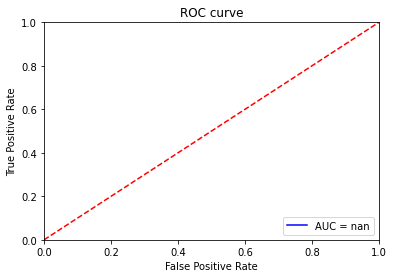


Mean square error:  0.4531634835874829


In [87]:
from sklearn.neighbors import KNeighborsClassifier
clf_KNN = KNeighborsClassifier(n_neighbors=3)
clf_KNN.fit(X_train, y_train)

valitation_model(X_test, y_test, clf_KNN)

# Random Forest

In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf_Rnd_frst = RandomForestClassifier(max_depth=10, random_state=5)
clf_Rnd_frst.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=5)

Score:  0.8638392857142857

Confusion matrix: 
Predict    0   1  All
Real                 
0        363   5  368
1         56  24   80
All      419  29  448

AUC:  nan



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


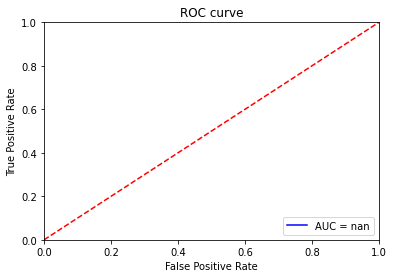


Mean square error:  0.36899961285306826


In [86]:
valitation_model(X_test, y_test, clf_Rnd_frst)